In [1]:
# Analysis to choose the best laser printer based on popularity and budget from Flipkart e-commerce site  

In [2]:
from bs4 import BeautifulSoup # for web scraping
import requests
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
# To get the data from https site
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
total_pages= 3 # Total pages in search result
responses = ""

for i in range(total_pages):
    pageno = i+1

    url = "https://www.flipkart.com/search?q=laser+printers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=popularity&page="+str(pageno)
    response = requests.get(url,headers)
    responses += response.content.decode()
  
soup = BeautifulSoup(responses, "html.parser")
print(soup)

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [4]:

# Find all product containers on the page, 
product_containers = soup.find_all("div", {"class": "_1AtVbE col-12-12"}) # Row level div

# List objects to store data

company_name = [] 
product_name = []
print_page_type = []
per_page_cost = []
cartrigetype = []
rating = []
no_of_people_rated = []
discount_percent = []
actual_price = []
selling_price = []
delivery = []
offer = []

# Extract information about each product
for container in product_containers:
    product_data = container.find_all("div", {"class": "_4ddWXP"}) # product level div  
    
    for col in product_data:
        product = col.find("a",{'class': "s1Q9rs"}).get('title') # product title 
        CartrigeType = col.find("div", {"class": "_3Djpdu"}).text # product cartridge type
        offerprice = col.find("div",{'class':"_30jeq3"}).text # product offer_price 
        
        actualprice = 0
        Rating = 0
        people_voted = 0
        discounts = 0
        delivery_by = ''
        other_offer = ''
        
        # check the number of people rated product 
        
        if col.find("span",{'class':"_2_R_DZ"}) is not None:
            people_voted = col.find("span",{'class':"_2_R_DZ"}).text
            people_voted = people_voted.replace("(", "").replace(")", "")
            people_voted = int(people_voted.replace(',',''))
            
        # check for product rating
            
        if col.find("div",{'class':"_3LWZlK"}) is not None:
            Rating = col.find("div",{'class':"_3LWZlK"}).text

        # check actual price of the product

        if col.find("div",{'class':"_3I9_wc"}) is not None:
            actualprice = col.find("div",{'class':"_3I9_wc"}).text
        
        # check total discounts on product
   
        if  col.find("div",{'class':"_3Ay6Sb"}) is not None:
            discounts = col.find("div",{'class':"_3Ay6Sb"}).text
        
        # check delivery option

        if  col.find("div",{'class':"_2Tpdn3"}) is not None:
            delivery_by = col.find("div",{'class':"_2Tpdn3"}).text
        
        # check if any other offer for a product

        if  col.find("div",{'class':"_3xFhiH"}) is not None:
            #offer = ' '.join([div.text for div in col.find_all('div', {'class': '_2Tpdn3 _18hQoS'})])
            other_offer = col.find("div",{'class':"_3xFhiH"}).text
            
        # If product contains print per page cost data which is available inside ()
        
        product_data = re.match(r"(.*) \((.*)\)", product)
        
        if product_data:
            
            # If Rs. data is available
            
            if 'Rs.' in product_data.group(2):
                product_title = product_data.group(1)
                page_type_cost = product_data.group(2).split(':')
                
                if len(page_type_cost) > 1:
                    page_type = page_type_cost[0].replace('Page Cost','').replace('Black ','Black')
                    page_cost = page_type_cost[1]
                else:
                    page_type = page_type_cost[0]
                    page_cost = None
                
            else:
                product_title = product
                page_type = None
                page_cost = None
        else:
            product_title = product
            page_type = None
            page_cost = None
       
       # Manufacturing company name
        
        company =   product_title.split(' ')
        
        if 'Yonkx' in company:
            company = 'Canon'
        else:
            company = company[0]
        
        # Add product data in a corresponding feature list
        
        company_name.append(company)        
        product_name.append(product_title)    
        print_page_type.append(page_type)
        per_page_cost.append(page_cost)
       
        cartrigetype.append(CartrigeType)
        rating.append(Rating)
        no_of_people_rated.append(people_voted)
        discount_percent.append(discounts)
        selling_price.append(offerprice)
        actual_price.append(actualprice)
        delivery.append(delivery_by)
        offer.append(other_offer)

       
        #print(company,'--',product_title,'--',page_type,'--',page_cost,'--',CartrigeType,'--',Rating,'--',people_voted,'--',
         #     offerprice,'--',actualprice,'--',discounts,'--',delivery_by,'--',other_offer)        
        
# Check the length of each feature list

print(len(product_name),len(cartrigetype),len(rating),len(no_of_people_rated),len(discount_percent),len(selling_price),len(actual_price),len(delivery),len(offer))

# Add each feature list data in to dataframe

df = pd.DataFrame({'company_name':company_name,'product_name':product_name,'print_page_type':print_page_type,'print_page_cost':per_page_cost,'cartrige_type':cartrigetype,'rating':rating,'no_of_people_rated':no_of_people_rated,
                  'discount_percent':discount_percent,'actual_price':actual_price,'selling_price':selling_price,'delivery':delivery,'offer':offer})


104 104 104 104 104 104 104 104 104


##### All  9 features is of same length

In [5]:
# check first 5 records

df.head()

,company_name,product_name,print_page_type,print_page_cost,cartrige_type,rating,no_of_people_rated,discount_percent,actual_price,selling_price,delivery,offer
0,HP,HP LaserJet Pro MFP M126nw Multi-function WiFi...,Black,3.28 Rs.,"Black, Toner Cartridge",4.3,3958,6% off,"₹23,525","₹21,999",Free delivery,"Upto ₹1,000 Off on Exchange"
1,brother,brother HL-L2321D IND Single Function Monochro...,Black,1.46 Rs.,"Grey, Toner Cartridge",4.5,3352,15% off,"₹11,790","₹9,949",Free delivery,"Upto ₹1,000 Off on Exchange"
2,HP,HP Laser MFP 136w Multi-function WiFi Monochro...,Black,3.13 Rs.,"White, Grey, Toner Cartridge",4.2,1049,14% off,"₹21,719","₹18,499",Free delivery,"Upto ₹1,000 Off on Exchange"
3,HP,HP MFP 138fnw Multi-function WiFi Monochrome L...,Black,0.31 Rs.,"White, Grey, Toner Cartridge",4.1,1429,15% off,"₹24,578","₹20,799",Free delivery,"Upto ₹1,000 Off on Exchange"
4,brother,brother DCP-L2520D IND Multi-function Monochro...,Black,1.46 Rs.,"Grey, Toner Cartridge",4.4,1279,7% off,"₹16,490","₹15,249",Free delivery,"Upto ₹1,000 Off on Exchange"


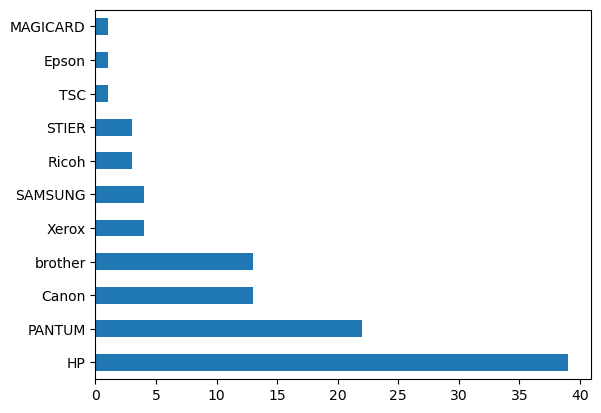

In [6]:
#### companywise laser printers availablity

df['company_name'].value_counts().plot.barh()
plt.show()

#### Total 11 company's laser printers are available 
- Most of the laser printers is from HP followed by PANTUM,brother and canon
- Very less number of laser printers is from Epson and MAGICARD 

In [7]:
# companywise min and max sales price

df['selling_price'] = df['selling_price'].str.replace('₹','').str.replace(',', '').astype(float)

df.groupby(['company_name'])['selling_price'].agg([min,max,np.mean])

,min,max,mean
company_name,,,
Canon,299.0,21083.0,14878.384615
Epson,27000.0,27000.0,27000.000000
HP,12299.0,74360.0,26074.205128
MAGICARD,48000.0,48000.0,48000.000000
PANTUM,6699.0,20199.0,12124.045455
Ricoh,15899.0,19999.0,17365.666667
SAMSUNG,7200.0,15299.0,10650.000000
STIER,39000.0,271000.0,136666.666667
TSC,26991.0,26991.0,26991.000000


##### Samsung laser printer's average cost is lowest followed by PANTUM and Xerox
##### STIER and MAGICARD laser printers are costlier

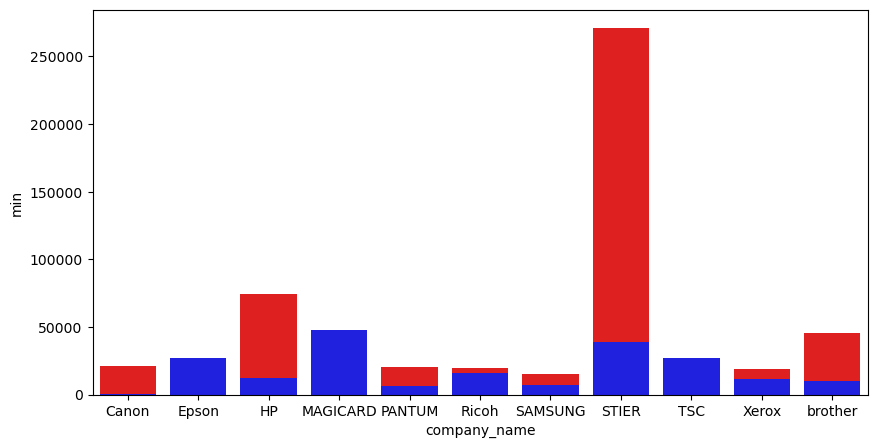

In [8]:
import seaborn as sns

min_max_df = df.groupby('company_name')['selling_price'].agg(['min', 'max'])
min_max_df = min_max_df.reset_index()
plt.figure(figsize=(10, 5))

sns.barplot(x='company_name', y='max', data=min_max_df, color='red')
sns.barplot(x='company_name', y='min', data=min_max_df, color='blue')
plt.show()

##### only one laser printer product is available from Epson,MAGICARD and TSC 

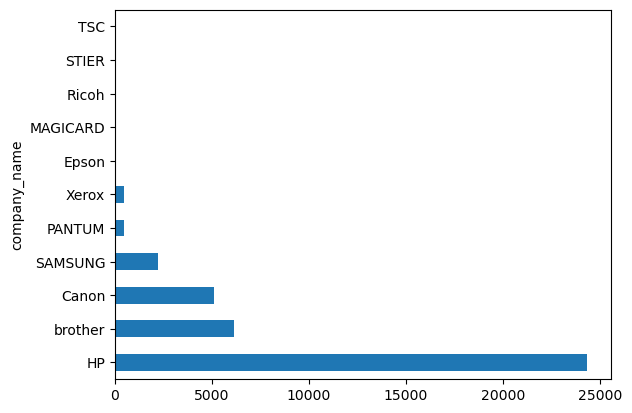

In [9]:
# People rated for each company

df.groupby(['company_name'])['no_of_people_rated'].sum().sort_values(ascending=False).plot.barh()
plt.show()

##### Laser printer ratings for TSC,STIER,Ricoh,MAGICARD and Epson company not available 

In [91]:
df_count = df.groupby('company_name')['no_of_people_rated'].sum().reset_index(name='count')
nonzero_company = df_count[df_count['count']>0]
nonzero_company

,company_name,count
0,Canon,5088
2,HP,24348
4,PANTUM,476
6,SAMSUNG,2208
9,Xerox,459
10,brother,6123


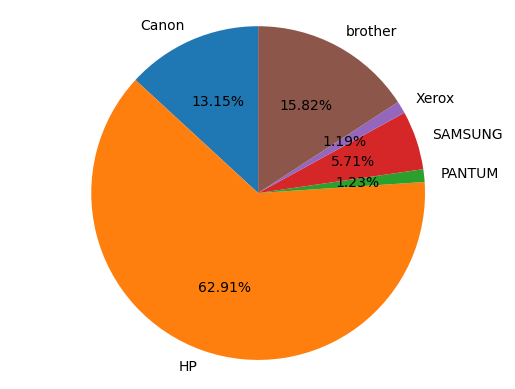

In [96]:
# total rating percentage for each company

plt.pie(nonzero_company['count'],labels=nonzero_company['company_name'], startangle=90, autopct='%1.2f%%')
plt.axis('equal')
plt.show()

##### Maximum i.e. 62.91 percent ratings is for HP company's laser printer
##### HP,Canon and brother contributes 92 % of total peoples vote

In [127]:
df['discount_percent'].unique()

array(['6% off', '15% off', '14% off', '7% off', '16% off', '11% off',
       '9% off', '23% off', '8% off', 0, '5% off', '12% off', '4% off',
       '1% off', '25% off', '3% off', '13% off', '19% off', '21% off',
       '20% off', '29% off', '24% off', '27% off', '2% off', '33% off',
       '32% off', '17% off', '31% off', '26% off', '56% off', '37% off',
       '22% off'], dtype=object)

In [158]:
# Check the maximum discount on laser printer 

df_count = df.dropna(subset=['discount_percent'])
df_count = df_count.copy()

df_count['discount_percent']= df_count['discount_percent'].str.replace('% off','').astype(int)

df_count[['discount_percent','product_name','no_of_people_rated','rating','selling_price']].sort_values(by='discount_percent',ascending=False)

,discount_percent,product_name,no_of_people_rated,rating,selling_price
84,56,Ricoh SP 6430DN Single Function Monochrome Las...,0,0,19999.0
91,37,Ricoh 212SNW PRINTER Multi-function Monochrome...,0,0,16199.0
47,33,PANTUM M6503 Printer Multi-function Monochrome...,0,0,13299.0
59,33,PANTUM P2503 Laser printer Single Function Mon...,0,0,9999.0
49,32,PANTUM P2500W Single Function WiFi Monochrome ...,104,4.2,6699.0
...,...,...,...,...,...
17,1,Canon LBP6030W Single Function WiFi Monochrome...,508,4.3,12799.0
87,1,Canon imageCLASS LBP2900B Single Function Lase...,4,2.3,19499.0
52,1,SAMSUNG Sl-M2021 Single Function Printer (Whit...,3,2,7200.0
69,1,brother HL-L5000D Single Function Monochrome L...,0,0,25819.0


#### Even though discount is too high i.e. 33 or more , people are not willing to purchase

In [139]:
# Top 5 products based on number of peoples rated

top_5_rated_product = df.sort_values(by='no_of_people_rated', ascending=False).head()
top_5_rated_product

,company_name,product_name,print_page_type,print_page_cost,cartrige_type,rating,no_of_people_rated,discount_percent,actual_price,selling_price,delivery,offer
23,HP,HP LaserJet M1005 MFP Multi-function Monochrom...,Black,3 Rs.,"White, Black, Toner Cartridge",4.5,4777,NaN,0,20520.0,Free delivery,"Upto ₹1,000 Off on Exchange"
0,HP,HP LaserJet Pro MFP M126nw Multi-function WiFi...,Black,3.28 Rs.,"Black, Toner Cartridge",4.3,3958,6,"₹23,525",21999.0,Free delivery,"Upto ₹1,000 Off on Exchange"
14,HP,HP LaserJet Pro MFP M126a Printer Multi-functi...,None,None,"Black, Toner Cartridge",4.3,3958,7,"₹21,090",19499.0,Free delivery,"Upto ₹1,000 Off on Exchange"
1,brother,brother HL-L2321D IND Single Function Monochro...,Black,1.46 Rs.,"Grey, Toner Cartridge",4.5,3352,15,"₹11,790",9949.0,Free delivery,"Upto ₹1,000 Off on Exchange"
101,HP,HP 1200w Multi-function WiFi Monochrome Laser ...,Black,0.28 Rs.,"White, Grey, Toner Cartridge",4.1,2561,6,"₹24,399",22799.0,Free delivery,Bank Offer


### Conclusion
- Total 11 company's printer are available on flipkart e-commerce site 
- Maximum number of laser printers on flipkart is from HP company.
- STIER and MAGICARD laser printers are costlier
- HP company's laser printers are famous in people because out of 5 top rated laser printer, 4 printers are from HP company
- If the price budget is less than ₹10,000 then brother company's "brother HL-L2321D IND Single Function Monochrome Laser   
  Printer"  with "Grey, Toner Cartridge" is recommended.
- If the price budget is around ₹20,000 then HP company's "HP LaserJet M1005 MFP Multi-function Monochrome Laser Printer" with     "White, Black, Toner Cartridge" is recommended.